## PyTorch基础代码实现
- 用PyTorch类实现Logistic regression,
- torch.nn.module写网络结构


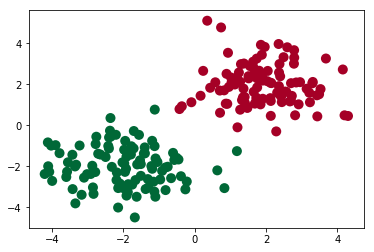

In [3]:
# 逻辑回归
# 基于二项分布假设的sigmoid函数的线性模型
import torch 
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np
from torch.autograd import Variable
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
torch.manual_seed(1000) 

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)
 
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # LongTensor = 64-bit integer
 
# 画图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [5]:
from torch import nn
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
 
    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        return x
logistic_model = LogisticRegression()
if torch.cuda.is_available():
    logistic_model.cuda()
# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3, momentum=0.9)


In [6]:
# 开始训练
for epoch in range(1000):
    if torch.cuda.is_available():
        x_data = Variable(x).cuda()
        y_data = Variable(y).cuda()
    else:
        x_data = Variable(x)
        y_data = Variable(y)
 
    out = logistic_model(x_data)
    loss = criterion(out, y_data)
    print_loss = loss.data.item()
    mask = out.ge(0.5).float()  # 以0.5为阈值进行分类
    correct = (mask == y_data).sum()  # 计算正确预测的样本个数
    acc = correct.item() / x_data.size(0)  # 计算精度
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每隔20轮打印一下当前的误差和精度
    if (epoch + 1) % 20 == 0:
        print('*'*10)
        print('epoch {}'.format(epoch+1)) # 训练轮数
        print('loss is {:.4f}'.format(print_loss))  # 误差
        print('acc is {:.4f}'.format(acc))  # 精度


C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


**********
epoch 20
loss is 0.3822
acc is 100.0000
**********
epoch 40
loss is 0.2787
acc is 100.0000
**********
epoch 60
loss is 0.2181
acc is 100.0000
**********
epoch 80
loss is 0.1811
acc is 100.0000
**********
epoch 100
loss is 0.1564
acc is 100.0000
**********
epoch 120
loss is 0.1386
acc is 100.0000
**********
epoch 140
loss is 0.1251
acc is 100.0000
**********
epoch 160
loss is 0.1144
acc is 100.0000
**********
epoch 180
loss is 0.1058
acc is 100.0000
**********
epoch 200
loss is 0.0987
acc is 100.0000
**********
epoch 220
loss is 0.0926
acc is 100.0000
**********
epoch 240
loss is 0.0874
acc is 100.0000
**********
epoch 260
loss is 0.0830
acc is 100.0000
**********
epoch 280
loss is 0.0790
acc is 100.0000
**********
epoch 300
loss is 0.0755
acc is 100.0000
**********
epoch 320
loss is 0.0724
acc is 100.0000
**********
epoch 340
loss is 0.0696
acc is 100.0000
**********
epoch 360
loss is 0.0671
acc is 100.0000
**********
epoch 380
loss is 0.0648
acc is 100.0000
**********
epoch

In [2]:
# torch.nn.module
import torch as t
from torch import nn

class Linear(nn.Module): # 继承nn.Module
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__() # 等价于nn.Module.__init__(self)
        self.w = nn.Parameter(t.randn(in_features, out_features))
        self.b = nn.Parameter(t.randn(out_features))
    
    def forward(self, x):
        x = x.mm(self.w) # x.@(self.w)
        return x + self.b.expand_as(x)

In [3]:
layer = Linear(4,3)
input = t.randn(2,4)
output = layer(input)
output

tensor([[ 2.5864,  2.7787,  0.9873],
        [-0.1639, -0.0602,  0.5310]], grad_fn=<AddBackward0>)

In [4]:
for name, parameter in layer.named_parameters():
    print(name, parameter) # w and b

w Parameter containing:
tensor([[ 1.0055,  0.4121,  1.0797],
        [-0.5461, -0.7724,  0.7426],
        [ 1.0217,  0.1475, -0.6147],
        [-0.2456, -1.0537, -0.3218]], requires_grad=True)
b Parameter containing:
tensor([-0.6949, -0.4831,  0.6941], requires_grad=True)
